In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
image = cv2.imread('image.jpg',cv2.IMREAD_GRAYSCALE)
img_height,img_width =  image.shape
L = 256

## Thresholding

In [21]:
threshold_val = int(input("Threshold Value: "))
threshold_img = np.zeros_like(image)
for row in range(img_height):
    for col in range(img_width):
        if image[row,col]>=threshold_val:
            threshold_img[row,col] = 255
        else:
            threshold_img[row,col] = 0

## Contrast Stretching

In [22]:
contrast_img = np.zeros_like(image)
r1, s1 = tuple(map(int,input("r1 s1").split(" ")))
r2, s2 = tuple(map(int,input("r2 s2").split(" ")))
alpha = s1 // r1
beta = (s2 - s1) // (r2 - r1)
gamma = (L - 1 - s2) // (L - 1 - r2)
for row in range(img_height):
    for col in range(img_width):
        r = image[row,col]
        if r<=r1:
            contrast_img[row,col] = alpha*r
        elif r1<r<=r2:
            contrast_img[row,col] = beta*(r-r1)+s1
        else:
            contrast_img[row,col] = gamma*(r-r2)+s2   


## Digital Negative

In [23]:
d_neg_img = np.zeros_like(image)
for row in range(img_height):
    for col in range(img_width):
        d_neg_img[row,col] = (L-1)-image[row,col]

## Gray Level Slicing

### With Background

In [24]:
gamma1,gamma2 = tuple(map(int,input("Gamma1, Gamma2: ").split(" ")))
gl_b_img = np.zeros_like(image)
for row in range(img_height):
    for col in range(img_width):
        if gamma1 <= image[row,col] <= gamma2:
            gl_b_img[row,col] = 255
        else:
            gl_b_img[row,col] = image[row,col]

### Without Background

In [25]:
gamma1,gamma2 = tuple(map(int,input("Gamma1, Gamma2: ").split(" ")))
gl_wb_img = np.zeros_like(image)
for row in range(img_height):
    for col in range(img_width):
        if gamma1 <= image[row,col] <= gamma2:
            gl_wb_img[row,col] = 255
        else:
            gl_wb_img[row,col] = 0

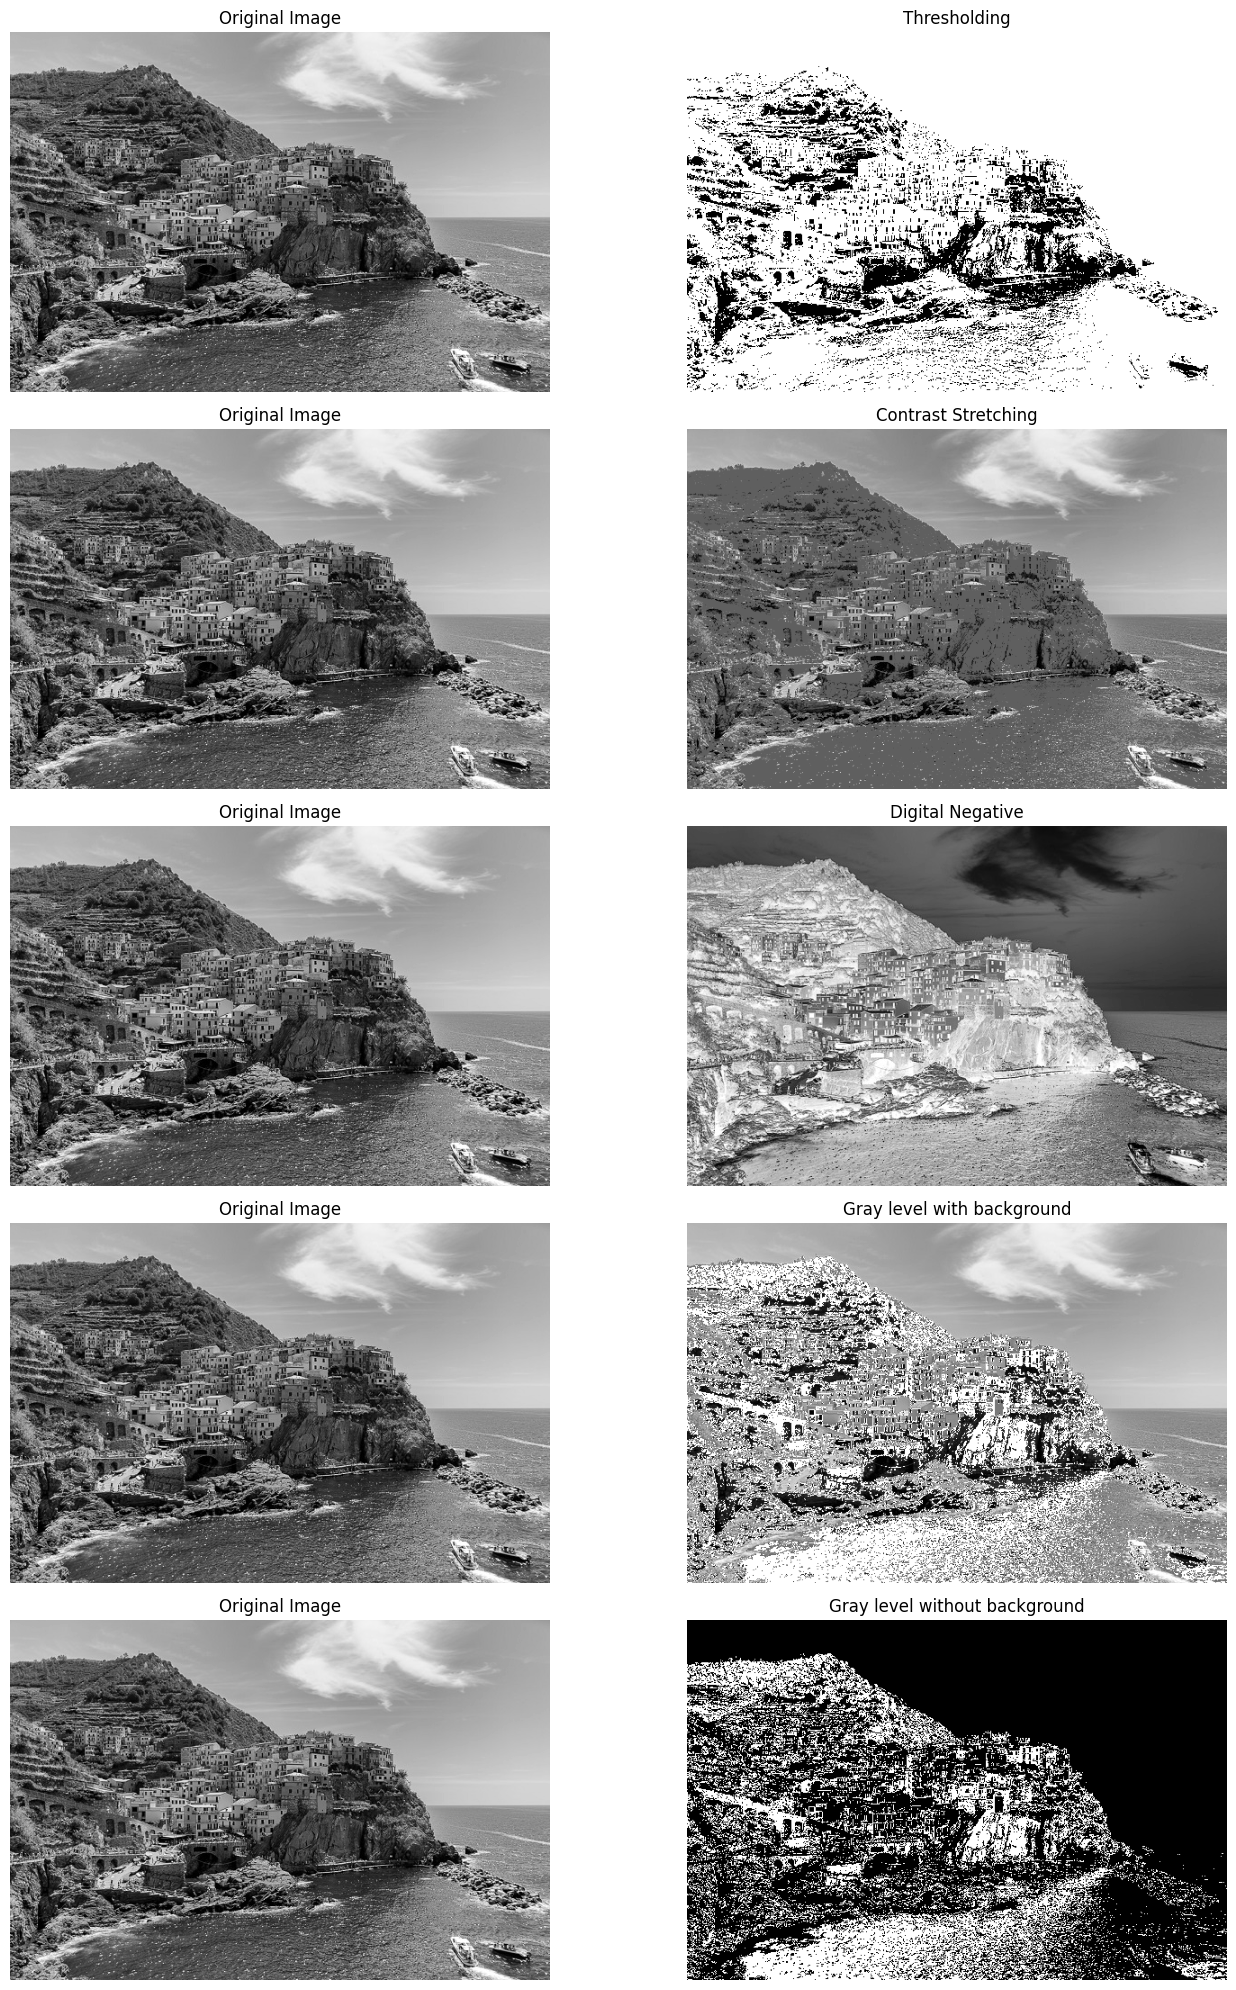

In [61]:
img_list = [threshold_img,contrast_img,d_neg_img,gl_b_img,gl_wb_img]
name_list = ['Thresholding', 'Contrast Stretching', 'Digital Negative', 'Gray level with background', 'Gray level without background']
plt.figure(figsize=(15,20))
n = len(img_list)
for i in range(1,n*2+1):
    plt.subplot(5,2,i)
    if i%2==1:
        plt.imshow(image,cmap='gray')
        plt.title("Original Image")
    else:
        index = i//2-1
        plt.imshow(img_list[index],cmap='gray')
        plt.title(name_list[index])
    plt.axis('off')        
plt.tight_layout()
plt.show()